# Курсовой проект 
### Дано: датасет Black Friday

Датасет взят с kaggle. Задача состоит в том, чтобы предсказать сумму покупок клиентов на распродаже Черная пятница.

**Описание данных**  
**User_ID** - идентификационный номер покупателя  
**Product_ID** - идентификационный номер товара    
**Age** - возраст покупателя  
**Occupation** - род деятельности покупателя  
**City_Category** - город проживания  
**Stay_In_Current_City_Years** - как долго покупатель живет в этом городе  
**Marital_Status** - семейное положение покупателя  
**Product_Category_1** - категория товара 1  
**Product_Category_2** - категория товара 2  
**Product_Category_3** - категория товара 3  
**Purchase** - сумма покупок  - **целевая переменная**


**Тема** - дисперсионный анализ c EDA

**0 гипотеза** - Признак не влияет на целевую переменную  
**Альтернативная гипотеза** - Средние арифметические по категориям признака имеют статистически существенные различия и признак оказывает влияние на таргет

Примем уровень значимости alpha на уровне 5%

### Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Пути к директориям

In [3]:
TRAIN_DATASET_PATH = './train.csv'

### Загрузка данных

In [4]:
df = pd.read_csv(TRAIN_DATASET_PATH)

print('Data is loaded!')

Data is loaded!


In [5]:
print(f'Train: {df.shape[0]} строк и {df.shape[1]} признаков')

Train: 80000 строк и 12 признаков


In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
df.head(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004085,P00075742,F,26-35,6,A,1,0,8,14.0,NaN,7803
1,1005491,P00234842,M,18-25,7,A,1,0,5,6.0,16.0,6903
2,1003499,P00220142,M,26-35,3,A,2,0,1,15.0,NaN,15773
3,1000097,P00211242,F,36-45,3,C,3,0,8,12.0,NaN,8116
4,1005802,P00327142,F,26-35,0,A,4+,0,8,15.0,NaN,6144
5,1001912,P00276942,M,26-35,4,A,1,1,8,NaN,NaN,2122
6,1004285,P00295942,M,36-45,0,B,3,0,2,5.0,15.0,12715
7,1003320,P00134542,M,26-35,1,B,1,1,5,14.0,NaN,1766
8,1003080,P00184942,M,26-35,20,A,4+,1,1,8.0,17.0,15837
9,1001194,P00111942,F,26-35,1,B,1,1,8,17.0,NaN,10071


### Определим признаки

In [8]:
feature_names = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

target_name = 'Purchase'

In [9]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

### **Изучим целевую переменную-  target**

In [10]:
df[target_name].describe()

count    80000.000000
mean      9243.933162
std       5021.298356
min         12.000000
25%       5679.750000
50%       8039.000000
75%      12046.000000
max      23961.000000
Name: Purchase, dtype: float64

In [11]:
target_mean = df[target_name].mean()

In [12]:
target_median = df[target_name].median()

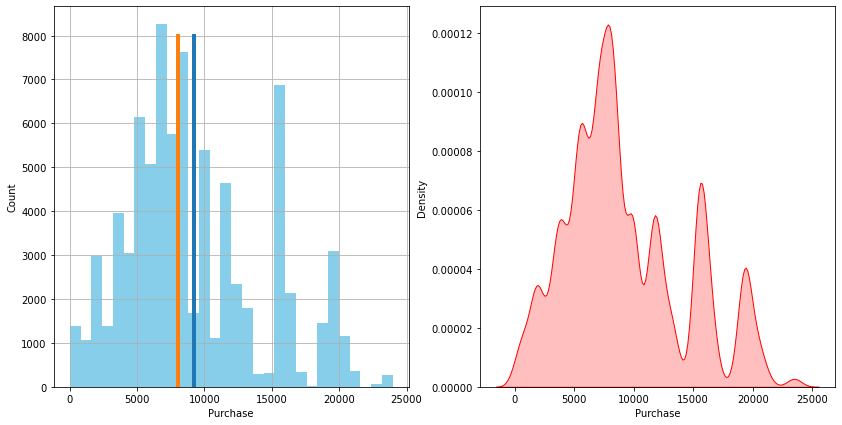

In [13]:
plt.figure(figsize = (14,7))

plt.subplot(121)
df[target_name].hist(bins = 30, color = 'skyblue')
y = np.linspace(0, 8000, 10)
plt.plot([target_mean]*10, y, label='mean',  linewidth=4)
plt.plot([target_median]*10, y, label='median',  linewidth=4)
plt.xlabel('Purchase')
plt.ylabel('Count')

plt.subplot(122)
sns.kdeplot(df[target_name], shade = True, color = 'red')

plt.show()

Распределение целевой переменной нельзя назвать нормальным, данные имеют очень широкие неоднородный разброс.

In [14]:
#Есть сильный неоднородный разброс после значения 14000. Посчитаем количество объектов наблюдений.
df.loc[df['Purchase'] > 14000, 'Purchase'].count()

16123

In [15]:
#Количество наблюдений достаточно большое, чтобы от него избавляться.
#df_train = df_train[df_train['Purchase'] < 14000]

In [16]:
df.loc[df['Purchase'] > 20000, 'Purchase'].count()

1822

In [17]:
#df_train = df_train[df_train['Purchase'] < 20000]

In [18]:
#Изучим слишком маленькие суммы покупкок
df.loc[df[target_name] < 100, target_name].sum()

8783

In [19]:
#df_train = df_train[df_train['Purchase'] > 100]

Попробовав разные варианты работы с целевой переменной, наиболее удачным вариантом оказалось не убирать из нее ни хвост, ни начало диапазона значаний, что обуславливается спецификой задачи и распространенностью Черной пятницы. Люди могут совершать покупку как на небольшие суммы, пользуясь приятной акцией, так и совершать крупные покупки, в том числе техника, или дорогая мебель для того, чтобы обустроить жилье.

Покупок на сумму свыше 20 000 мало, но я не решаюсь называть это выбросом, т.к. речь идет о покупках и действительно позволить себе сделать крупную покупку может далеко не каждый, и, вероятно, кто-то дождался распродажи купить выгоднее что-то дорогое

### Исследуемый датасет состоит из категориальных признаков.  
### Изучим основные подробнее, а также оценим их влияние на целевую переменуню при помощи дисперсионного анализа

#### Gender - пол

In [20]:
gender_counts = df['Gender'].value_counts()
gender_counts

M    60068
F    19932
Name: Gender, dtype: int64

Количество покупателей мужчин почти в 3 раза превосходит количество покупателей женщин
Если при изучении значимости признаков окажется, что пол оказывает большое влияние на целевую переменную, необходимо с осторожностью обрабатывать спрос покупателей-женщин, т.к. их доля существенно меньше и ошибки будут иметь бОльший вес

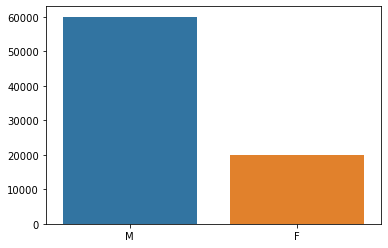

In [21]:
sns.barplot(gender_counts.index, gender_counts.values)
plt.show()

In [22]:
df.loc[df['Gender'] == 'M', 'Gender'] = 1
df.loc[df['Gender'] == 'F', 'Gender'] = 0

#### Изучим влияние признака Age при помощи дисперсионного анализа.

In [23]:
stats.f_oneway((df.loc[df['Gender']==0, 'Purchase']), 
               (df.loc[df['Gender']==1, 'Purchase'])) 

F_onewayResult(statistic=272.2533617505495, pvalue=4.622890567169226e-61)

**Вывод** p-value cущественно меньше уровня значимости 5%, значит принимаем альтернативную гипотезу, т.е. средние арифметически имеют статистически значимые различия и признак Gender оказывает влияние на целевую переменную

#### Age - возраст

В данном признаке целесообразно определить минимум и максимум для понимания диапазона взраста покупателей

In [24]:
# Определим количество возрастных групп в наблюдениях:
df['Age'].nunique()

7

In [25]:
# Посмотрим заброс покупателей по возрастным группам:
age_counts = df['Age'].value_counts()
age_counts

26-35    32067
36-45    16025
18-25    14286
46-50     6777
51-55     5555
55+       3110
0-17      2180
Name: Age, dtype: int64

Наибольшее количество покупок приходится на возрастную группу 26-35 лет. Можно предположить, что опираясь именно на этот возраст, можно выявить основные тендеции
Самые низкие показатели у покупателей до 18 лет и у покупателей старше 55.

Можно допустить, что небольшая доля покупок у покупалетей до 18 лет связана с ограничениями на площадке продажи

Посмотрим нагляднее:

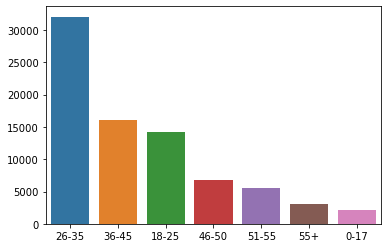

In [26]:
sns.barplot(age_counts.index, age_counts.values)
plt.show()

In [27]:
#Изучим соотношение мужчин и жещин в каждой возрастной группе
df.groupby(['Age', 'Gender'])['User_ID'].count()

Age    Gender
0-17   0           779
       1          1401
18-25  0          3634
       1         10652
26-35  0          7526
       1         24541
36-45  0          3943
       1         12082
46-50  0          1917
       1          4860
51-55  0          1393
       1          4162
55+    0           740
       1          2370
Name: User_ID, dtype: int64

Более всего бросается в глаза разница в группе 26-35 лет и старше 55 лет

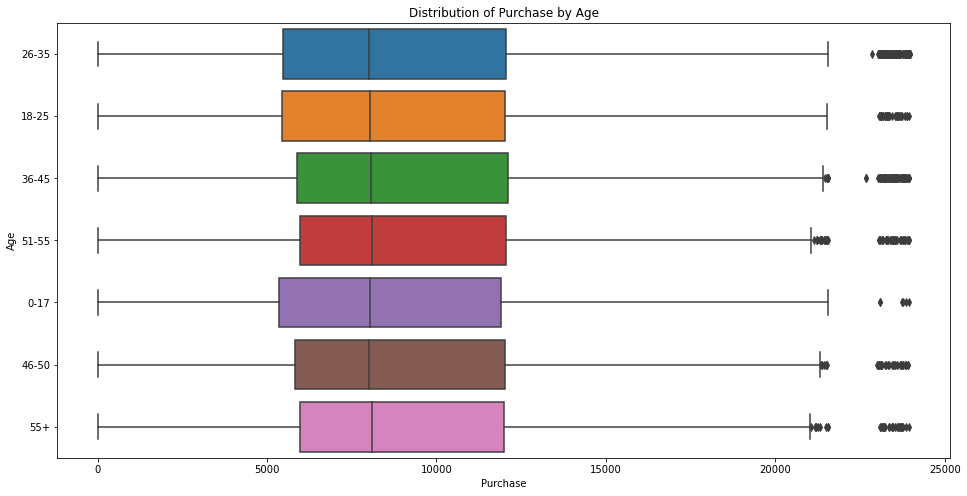

In [28]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['Purchase'], df['Age'], whis=1.5)

plt.xlabel('Purchase')
plt.ylabel('Age')
plt.title('Distribution of Purchase by Age')
plt.show()

По графику можно сделать вывод, что категории признака Age распределены с небольшими различиями, значение медианы примерно совпадает

#### Изучим влияние признака Age при помощи дисперсионного анализа.

In [29]:
df.loc[df['Age'] == '0-17', 'Age'] = 1
df.loc[df['Age'] == '18-25', 'Age'] = 2
df.loc[df['Age'] == '26-35', 'Age'] = 3
df.loc[df['Age'] == '36-45', 'Age'] = 4
df.loc[df['Age'] == '46-50', 'Age'] = 5
df.loc[df['Age'] == '51-55', 'Age'] = 6
df.loc[df['Age'] == '55+', 'Age'] = 7

In [30]:
stats.f_oneway((df.loc[df['Age']==1, 'Purchase']), 
               (df.loc[df['Age']==2, 'Purchase']), 
               (df.loc[df['Age']==3, 'Purchase']),
               (df.loc[df['Age']==4, 'Purchase']),
               (df.loc[df['Age']==5, 'Purchase']),
               (df.loc[df['Age']==6, 'Purchase']),
               (df.loc[df['Age']==7, 'Purchase']))

F_onewayResult(statistic=2.8128028236356317, pvalue=0.009752015972145037)

**Вывод:** p-value меньше уровня значимости 5%, значит принимаем альтернативную гипотезу, признак имеет влияние на целевую переменную

#### Stay_In_Current_City_Years - кол-во лет проживания в текущем городе

In [31]:
staying_counts = df['Stay_In_Current_City_Years'].value_counts()
staying_counts

1     28287
2     14830
3     13853
4+    12250
0     10780
Name: Stay_In_Current_City_Years, dtype: int64

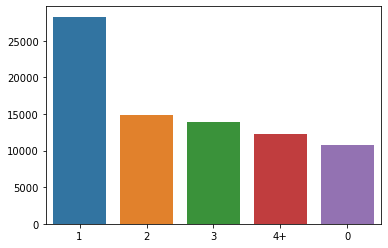

In [32]:
sns.barplot(staying_counts.index, staying_counts.values)
plt.show()

Наибольшая доля покупателей - проживащие в городе примерно 1 год

Наименьшая у только прибывших, что логично.

In [33]:
city_group = df.groupby(['Stay_In_Current_City_Years', 'City_Category'])['User_ID'].count()
city_group

Stay_In_Current_City_Years  City_Category
0                           A                 3472
                            B                 4220
                            C                 3088
1                           A                 7170
                            B                12204
                            C                 8913
2                           A                 3949
                            B                 6065
                            C                 4816
3                           A                 3638
                            B                 6210
                            C                 4005
4+                          A                 3226
                            B                 5068
                            C                 3956
Name: User_ID, dtype: int64

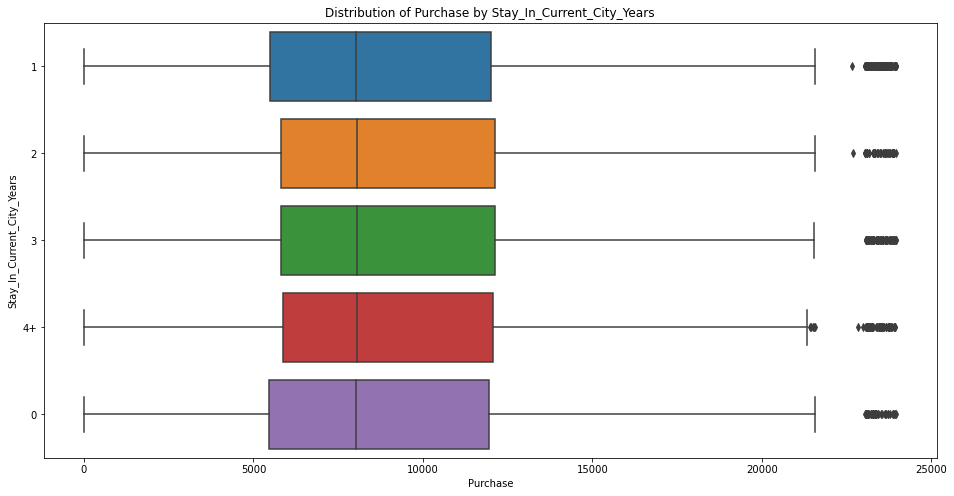

In [34]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['Purchase'], df['Stay_In_Current_City_Years'], whis=1.5)

plt.xlabel('Purchase')
plt.ylabel('Stay_In_Current_City_Years')
plt.title('Distribution of Purchase by Stay_In_Current_City_Years')
plt.show()

Распределение категорий признака Stay_In_Current_City_Years похоже на рапределение признака Age - медиана совпадает, интерквантильный размах несколько отличается от категории к категории

#### Изучение влияние признака на целевую переменную при помощи дисперсионного анализа

In [35]:
df.loc[df['Stay_In_Current_City_Years'] == '0', 'Stay_In_Current_City_Years'] = 1
df.loc[df['Stay_In_Current_City_Years'] == '1', 'Stay_In_Current_City_Years'] = 2
df.loc[df['Stay_In_Current_City_Years'] == '2', 'Stay_In_Current_City_Years'] = 3
df.loc[df['Stay_In_Current_City_Years'] == '3', 'Stay_In_Current_City_Years'] = 4
df.loc[df['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 5

In [36]:
stats.f_oneway((df.loc[df['Stay_In_Current_City_Years']==1, 'Purchase']), 
               (df.loc[df['Stay_In_Current_City_Years']==2, 'Purchase']), 
               (df.loc[df['Stay_In_Current_City_Years']==3, 'Purchase']),
               (df.loc[df['Stay_In_Current_City_Years']==4, 'Purchase']),
               (df.loc[df['Stay_In_Current_City_Years']==5, 'Purchase']))

F_onewayResult(statistic=4.439336854806622, pvalue=0.001377466094480952)

**Вывод** Уровень значимости 5% превышает p-value. Следовательно, отвергаем нулевую гипотезу и принимаем альтернативную.

#### Occupation - категория рода деятельности

In [37]:
df['Occupation'].unique()

array([ 6,  7,  3,  0,  4,  1, 20, 18, 14, 17, 16, 10, 12,  2, 15, 19,  9,
       13,  5, 11,  8])

In [38]:
df['Occupation'].nunique()

21

In [39]:
occupation_counts = df['Occupation'].value_counts().sort_index()
occupation_counts

0     10188
1      6921
2      3849
3      2598
4     10443
5      1824
6      2902
7      8474
8       234
9       857
10     1876
11     1706
12     4559
13     1132
14     4030
15     1712
16     3724
17     5815
18     1011
19     1258
20     4887
Name: Occupation, dtype: int64

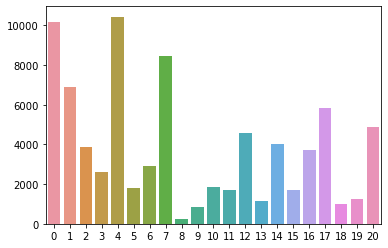

In [40]:
sns.barplot(occupation_counts.index, occupation_counts.values)
plt.show()

Большая часть покупок приходится на покупателей, работающих в сфере деятельности 0, 1 и 7.

Совсем мало покупок совершают покупатели категории 8 

#### Изучение влияние признака на целевую переменную при помощи дисперсионного анализа

In [41]:
stats.f_oneway((df.loc[df['Occupation']==0, 'Purchase']), 
               (df.loc[df['Occupation']==1, 'Purchase']), 
               (df.loc[df['Occupation']==2, 'Purchase']),
               (df.loc[df['Occupation']==3, 'Purchase']),
               (df.loc[df['Occupation']==4, 'Purchase']),
               (df.loc[df['Occupation']==5, 'Purchase']),
               (df.loc[df['Occupation']==6, 'Purchase']),
               (df.loc[df['Occupation']==7, 'Purchase']),
               (df.loc[df['Occupation']==8, 'Purchase']),
               (df.loc[df['Occupation']==9, 'Purchase']),
               (df.loc[df['Occupation']==10, 'Purchase']),
               (df.loc[df['Occupation']==11, 'Purchase']), 
               (df.loc[df['Occupation']==12, 'Purchase']), 
               (df.loc[df['Occupation']==13, 'Purchase']),
               (df.loc[df['Occupation']==14, 'Purchase']),
               (df.loc[df['Occupation']==15, 'Purchase']),
               (df.loc[df['Occupation']==16, 'Purchase']),
               (df.loc[df['Occupation']==17, 'Purchase']),
               (df.loc[df['Occupation']==18, 'Purchase']),
               (df.loc[df['Occupation']==19, 'Purchase']),
               (df.loc[df['Occupation']==20, 'Purchase']))

F_onewayResult(statistic=15.547497384651336, pvalue=6.098409080470531e-54)

**Вывод** p-value cущественно меньше уровня значимости 5%, значит принимаем альтернативную гипотезу, т.е. средние арифметически имеют статистически значимые различия и признак Occupation оказывает влияние на целевую переменную

#### City_Category - город проживания

In [42]:
city_counts = df['City_Category'].value_counts()
city_counts

B    33767
C    24778
A    21455
Name: City_Category, dtype: int64

<AxesSubplot:>

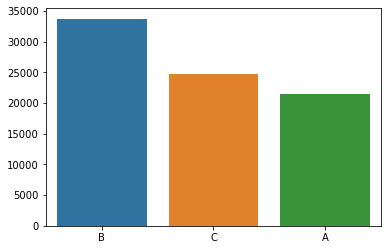

In [43]:
sns.barplot(city_counts.index, city_counts.values)

Изучаются покупатели в 3 городах, большая часть которых проживает в городе B.
Распределение по городам в целом можно назвать равномерным 

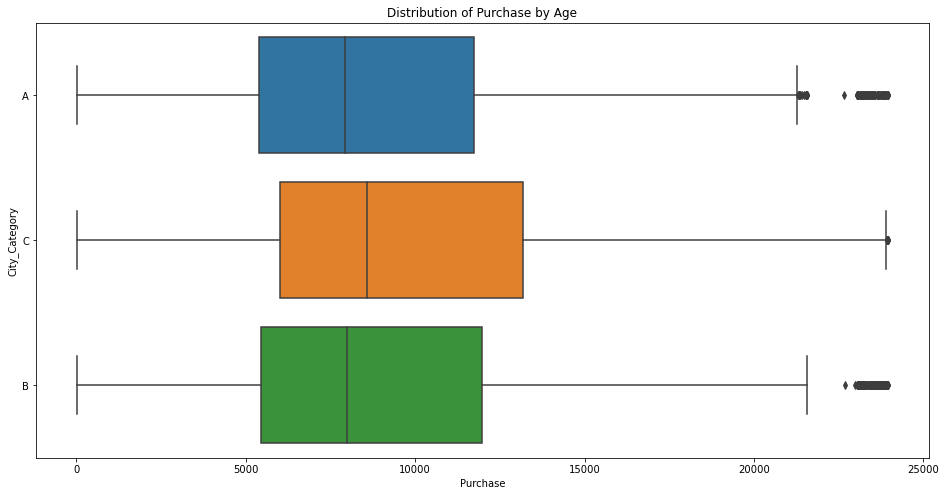

In [44]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['Purchase'], df['City_Category'], whis=1.5)

plt.xlabel('Purchase')
plt.ylabel('City_Category')
plt.title('Distribution of Purchase by Age')
plt.show()

На графике распределение категорий отличается.
#### Изучим влияние признака City_Category на целевую переменную с помощью дисперсионного анализа

In [45]:
df.loc[df['City_Category'] == 'A', 'City_Category'] = 0
df.loc[df['City_Category'] == 'B', 'City_Category'] = 1
df.loc[df['City_Category'] == 'C', 'City_Category'] = 2

In [46]:
stats.f_oneway((df.loc[df['City_Category']==0, 'Purchase']), 
               (df.loc[df['City_Category']==1, 'Purchase']), 
               (df.loc[df['City_Category']==2, 'Purchase']))

F_onewayResult(statistic=173.5555349851725, pvalue=6.149554151245853e-76)

**Вывод** p-value cущественно меньше уровня значимости 5%, значит принимаем альтернативную гипотезу, т.е. средние арифметически имеют статистически значимые различия и признак City_Category оказывает влияние на целевую переменную

#### Marital_Status  

In [47]:
marital_counts = df['Marital_Status'].value_counts()

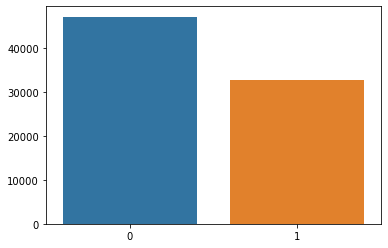

In [48]:
sns.barplot(marital_counts.index, marital_counts.values)
plt.show()

Сильного разброса между людьми,  находящимися в браке и не в браке нет. 

In [49]:
df.groupby(['Age', 'Marital_Status'])['User_ID'].count()

Age  Marital_Status
1    0                  2180
2    0                 11234
     1                  3052
3    0                 19572
     1                 12495
4    0                  9695
     1                  6330
5    0                  1871
     1                  4906
6    0                  1581
     1                  3974
7    0                  1116
     1                  1994
Name: User_ID, dtype: int64

В группах до 45 лет большинство покупок делают люди, не находящиеся в браке и с каждой группой разница сокращается. 
После 46 лет доля покупателей в браке существенно превышает долю неженатых. Вероятно, в данном регионе достаточно поздний возраст вступления в брак

До 18 лет вступивших в брак нет - выбросов в данном случае не обнаружено

#### Изучим влияние признака на целевую переменную с помощью дисперсионного анализа

In [50]:
stats.f_oneway((df.loc[df['Marital_Status']==0, 'Purchase']), 
               (df.loc[df['Marital_Status']==1, 'Purchase']))

F_onewayResult(statistic=0.7893786419521853, pvalue=0.3742907479940376)

**Вывод** p-value 37% cущественно выше уровня значимости 5%, значит принимаем нулевую гипотезу, т.е. средние арифметически не имеют статистически значимых различий и признак Marital_Status не оказывает влияние на целевую переменную

**ИТОГО** из изученных категориальных признаков, Marital_Status не оказывает влияния на целевой признак Purchase в результате проведенного дисперсионного анализа при заданном уровне значимости 5%